In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from scipy import stats
from scipy.stats import norm
import unicodedata

import pygal
import plotly.express as px

In [8]:
df = pd.read_csv("house.csv")

df


,left-image href,dealer-name,temp-auto src,title,address,price,price-addition,description,left-side,left-side (2),...,left-side (3),urgent-label,sticker-checkbox,sticker-checkbox (2),sticker-checkbox (3),v-label,comments-count,lazy src,cad-label href,cad-label
0,https://www.house.kg/details/52927466900a872c8...,Айнура Убышева,https://cdn.house.kg/house/images/a/e/9/ae9af4...,"Дом, 6 и более комнат, 313 м2, 8.7 соток","Бишкек, с. Чон-Арык, Береговая/Семетей",$ 500 000,43 730 000 сом,Срочно Продается отличный дом 6 комнат в район...,1 час назад,103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.house.kg/details/310429668cedc2fa6...,NaN,https://cdn.house.kg/house/images/c/a/e/cae709...,"Дом, 5-комн., 284 м2, 4.27 сотки","Бишкек, Сквер Тоголок Молдо, Московский Исанов...",$ 434 484,38 000 000 сом,NaN,11 часов назад,1679,...,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.house.kg/details/264714168b86626dd...,NaN,https://cdn.house.kg/house/images/6/e/4/6e4a72...,"Дом, 3-комн., 97 м2, 5 соток","с. Новопокровка, Ул. Чкалова",$ 74 950,6 555 127 сом,Продается современный таунхаус Земля на красно...,19 часов назад,8710,...,24.0,СРОЧНО,Торг уместен,Один владелец,Возможен обмен,NaN,NaN,NaN,NaN,NaN
3,https://www.house.kg/details/797117368d4e8b3db...,NaN,https://cdn.house.kg/house/images/8/8/e/88e8dc...,"Дом, 5-комн., 260 м2, 22 сотки","с. Таш-Мойнок, Новая 60",$ 770 000,67 344 200 сом,Продается дом за городом в экологически чистом...,24 часа назад,2452,...,45.0,СРОЧНО,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.house.kg/details/289700067b94c80d8...,NaN,https://cdn.house.kg/house/images/d/4/5/d45200...,"Дом, 4-комн., 70 м2, 600 соток","Иссык-Кульская область, Каракол, Мирная 10/Кра...",$ 85 000,7 434 100 сом,"Престижный район, рядом строящийся большой дом...",7 часов назад,626,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2759,https://www.house.kg/details/855603167a1c7bd44...,NaN,NaN,"Дом, 3-комн., 50 м2, 2 сотки","Бишкек, Восточный автовокзал, Абдумомунова",$ 74 000,6 472 040 сом,Срочно продаю 3 комн. кв частный дом 50 м2 По ...,2 месяца назад,2625,...,9.0,NaN,NaN,NaN,NaN,Ассоциация риелторов КР,NaN,NaN,NaN,NaN
2760,https://www.house.kg/details/272628967a1a9490b...,NaN,NaN,"Дом, 6 и более комнат, 168 м2, 4 сотки","Бишкек, Колмо ж/м, УМУТ",$ 82 500,7 215 450 сом,"СРОЧНО!!! ✅ Дом: двухэтажный, размером 9x8 м. ...",2 месяца назад,2011,...,13.0,NaN,NaN,NaN,NaN,Ассоциация риелторов КР,NaN,NaN,NaN,NaN
2761,https://www.house.kg/details/1251747679db096ea...,NaN,NaN,"Дом, 6 и более комнат, 280 м2, 4.3 сотки","Бишкек, Ак-Босого ж/м",$ 78 500,6 865 610 сом,🌟 Срочная продажа двухэтажного кирпичного дома...,2 месяца назад,2101,...,20.0,NaN,NaN,NaN,NaN,Ассоциация риелторов КР,NaN,NaN,NaN,NaN
2762,https://www.house.kg/details/455673467a071575f...,NaN,NaN,"Дом, 6 и более комнат, 190 м2, 5 соток","Бишкек, Ак-Ордо ж/м",$ 151 000,13 206 460 сом,Продается большой 2-этажный дом . Район: ж\м А...,2 месяца назад,1117,...,8.0,NaN,NaN,NaN,NaN,Ассоциация риелторов КР,NaN,NaN,NaN,NaN


In [9]:
total_nans = df.isna().sum().sum()
print("Всего NaN:", total_nans)

Всего NaN: 29069


In [10]:
print(df.isna().sum())


left-image href            0
dealer-name             1063
temp-auto src            901
title                      0
address                    0
price                      0
price-addition             0
description              151
left-side                  0
left-side (2)              0
ownership               2577
left-side (3)            777
urgent-label            2760
sticker-checkbox        2746
sticker-checkbox (2)    2747
sticker-checkbox (3)    2750
v-label                 2168
comments-count          2750
lazy src                2755
cad-label href          2462
cad-label               2462
dtype: int64


In [4]:
df = df.fillna('N/T')
df.head()

,left-image href,dealer-name,temp-auto src,title,address,price,price-addition,description,left-side,left-side (2),...,left-side (3),urgent-label,sticker-checkbox,sticker-checkbox (2),sticker-checkbox (3),v-label,comments-count,lazy src,cad-label href,cad-label
0,https://www.house.kg/details/52927466900a872c8...,Айнура Убышева,https://cdn.house.kg/house/images/a/e/9/ae9af4...,"Дом, 6 и более комнат, 313 м2, 8.7 соток","Бишкек, с. Чон-Арык, Береговая/Семетей",$ 500 000,43 730 000 сом,Срочно Продается отличный дом 6 комнат в район...,1 час назад,103,...,N/T,N/T,N/T,N/T,N/T,N/T,N/T,N/T,N/T,N/T
1,https://www.house.kg/details/310429668cedc2fa6...,N/T,https://cdn.house.kg/house/images/c/a/e/cae709...,"Дом, 5-комн., 284 м2, 4.27 сотки","Бишкек, Сквер Тоголок Молдо, Московский Исанов...",$ 434 484,38 000 000 сом,N/T,11 часов назад,1679,...,8.0,N/T,N/T,N/T,N/T,N/T,N/T,N/T,N/T,N/T
2,https://www.house.kg/details/264714168b86626dd...,N/T,https://cdn.house.kg/house/images/6/e/4/6e4a72...,"Дом, 3-комн., 97 м2, 5 соток","с. Новопокровка, Ул. Чкалова",$ 74 950,6 555 127 сом,Продается современный таунхаус Земля на красно...,19 часов назад,8710,...,24.0,СРОЧНО,Торг уместен,Один владелец,Возможен обмен,N/T,N/T,N/T,N/T,N/T
3,https://www.house.kg/details/797117368d4e8b3db...,N/T,https://cdn.house.kg/house/images/8/8/e/88e8dc...,"Дом, 5-комн., 260 м2, 22 сотки","с. Таш-Мойнок, Новая 60",$ 770 000,67 344 200 сом,Продается дом за городом в экологически чистом...,24 часа назад,2452,...,45.0,СРОЧНО,N/T,N/T,N/T,N/T,N/T,N/T,N/T,N/T
4,https://www.house.kg/details/289700067b94c80d8...,N/T,https://cdn.house.kg/house/images/d/4/5/d45200...,"Дом, 4-комн., 70 м2, 600 соток","Иссык-Кульская область, Каракол, Мирная 10/Кра...",$ 85 000,7 434 100 сом,"Престижный район, рядом строящийся большой дом...",7 часов назад,626,...,2.0,N/T,N/T,N/T,N/T,N/T,N/T,N/T,N/T,N/T


In [5]:
df = df.drop(
    columns=[
        "left-image href",
        "temp-auto src",
        "cad-label",
        "cad-label href",
        "lazy src",
        "comments-count",
        "v-label",
        "tagText-VVyl-",
        "lazy-image src",
        "dealer-name",
        "left-side",
        "left-side (3)",
        "sticker-checkbox",
        "sticker-checkbox (2)",
        "sticker-checkbox (3)"
        
        
    ],
    errors="ignore"
)

df.to_csv("output.csv", index=False)

df 

,title,address,price,price-addition,description,left-side (2),ownership,urgent-label
0,"Дом, 6 и более комнат, 313 м2, 8.7 соток","Бишкек, с. Чон-Арык, Береговая/Семетей",$ 500 000,43 730 000 сом,Срочно Продается отличный дом 6 комнат в район...,103,N/T,N/T
1,"Дом, 5-комн., 284 м2, 4.27 сотки","Бишкек, Сквер Тоголок Молдо, Московский Исанов...",$ 434 484,38 000 000 сом,N/T,1679,СОБСТВЕННИК,N/T
2,"Дом, 3-комн., 97 м2, 5 соток","с. Новопокровка, Ул. Чкалова",$ 74 950,6 555 127 сом,Продается современный таунхаус Земля на красно...,8710,СОБСТВЕННИК,СРОЧНО
3,"Дом, 5-комн., 260 м2, 22 сотки","с. Таш-Мойнок, Новая 60",$ 770 000,67 344 200 сом,Продается дом за городом в экологически чистом...,2452,СОБСТВЕННИК,СРОЧНО
4,"Дом, 4-комн., 70 м2, 600 соток","Иссык-Кульская область, Каракол, Мирная 10/Кра...",$ 85 000,7 434 100 сом,"Престижный район, рядом строящийся большой дом...",626,СОБСТВЕННИК,N/T
...,...,...,...,...,...,...,...,...
2759,"Дом, 3-комн., 50 м2, 2 сотки","Бишкек, Восточный автовокзал, Абдумомунова",$ 74 000,6 472 040 сом,Срочно продаю 3 комн. кв частный дом 50 м2 По ...,2625,N/T,N/T
2760,"Дом, 6 и более комнат, 168 м2, 4 сотки","Бишкек, Колмо ж/м, УМУТ",$ 82 500,7 215 450 сом,"СРОЧНО!!! ✅ Дом: двухэтажный, размером 9x8 м. ...",2011,N/T,N/T
2761,"Дом, 6 и более комнат, 280 м2, 4.3 сотки","Бишкек, Ак-Босого ж/м",$ 78 500,6 865 610 сом,🌟 Срочная продажа двухэтажного кирпичного дома...,2101,N/T,N/T
2762,"Дом, 6 и более комнат, 190 м2, 5 соток","Бишкек, Ак-Ордо ж/м",$ 151 000,13 206 460 сом,Продается большой 2-этажный дом . Район: ж\м А...,1117,N/T,N/T


In [6]:
df = df.drop_duplicates()
df

,title,address,price,price-addition,description,left-side (2),ownership,urgent-label
0,"Дом, 6 и более комнат, 313 м2, 8.7 соток","Бишкек, с. Чон-Арык, Береговая/Семетей",$ 500 000,43 730 000 сом,Срочно Продается отличный дом 6 комнат в район...,103,N/T,N/T
1,"Дом, 5-комн., 284 м2, 4.27 сотки","Бишкек, Сквер Тоголок Молдо, Московский Исанов...",$ 434 484,38 000 000 сом,N/T,1679,СОБСТВЕННИК,N/T
2,"Дом, 3-комн., 97 м2, 5 соток","с. Новопокровка, Ул. Чкалова",$ 74 950,6 555 127 сом,Продается современный таунхаус Земля на красно...,8710,СОБСТВЕННИК,СРОЧНО
3,"Дом, 5-комн., 260 м2, 22 сотки","с. Таш-Мойнок, Новая 60",$ 770 000,67 344 200 сом,Продается дом за городом в экологически чистом...,2452,СОБСТВЕННИК,СРОЧНО
4,"Дом, 4-комн., 70 м2, 600 соток","Иссык-Кульская область, Каракол, Мирная 10/Кра...",$ 85 000,7 434 100 сом,"Престижный район, рядом строящийся большой дом...",626,СОБСТВЕННИК,N/T
...,...,...,...,...,...,...,...,...
2759,"Дом, 3-комн., 50 м2, 2 сотки","Бишкек, Восточный автовокзал, Абдумомунова",$ 74 000,6 472 040 сом,Срочно продаю 3 комн. кв частный дом 50 м2 По ...,2625,N/T,N/T
2760,"Дом, 6 и более комнат, 168 м2, 4 сотки","Бишкек, Колмо ж/м, УМУТ",$ 82 500,7 215 450 сом,"СРОЧНО!!! ✅ Дом: двухэтажный, размером 9x8 м. ...",2011,N/T,N/T
2761,"Дом, 6 и более комнат, 280 м2, 4.3 сотки","Бишкек, Ак-Босого ж/м",$ 78 500,6 865 610 сом,🌟 Срочная продажа двухэтажного кирпичного дома...,2101,N/T,N/T
2762,"Дом, 6 и более комнат, 190 м2, 5 соток","Бишкек, Ак-Ордо ж/м",$ 151 000,13 206 460 сом,Продается большой 2-этажный дом . Район: ж\м А...,1117,N/T,N/T


In [103]:
def to_int(series: pd.Series) -> pd.Series:

    cleaned = (series.astype(str)
                     .str.replace('\u202f', '', regex=False)   
                     .str.replace('\u00a0', '', regex=False)  
                     .str.replace(r'[^\d]', '', regex=True)) 
    return pd.to_numeric(cleaned, errors='coerce').astype('Int64')

df['price'] = to_int(df['price'])
df['price-addition'] = to_int(df['price-addition'])

df

,title,address,price,price-addition,description,left-side (2),ownership,urgent-label
0,"Дом, 6 и более комнат, 313 м2, 8.7 соток","Бишкек, с. Чон-Арык, Береговая/Семетей",500000,43730000,Срочно Продается отличный дом 6 комнат в район...,103,N/T,N/T
1,"Дом, 5-комн., 284 м2, 4.27 сотки","Бишкек, Сквер Тоголок Молдо, Московский Исанов...",434484,38000000,N/T,1679,СОБСТВЕННИК,N/T
2,"Дом, 3-комн., 97 м2, 5 соток","с. Новопокровка, Ул. Чкалова",74950,6555127,Продается современный таунхаус Земля на красно...,8710,СОБСТВЕННИК,СРОЧНО
3,"Дом, 5-комн., 260 м2, 22 сотки","с. Таш-Мойнок, Новая 60",770000,67344200,Продается дом за городом в экологически чистом...,2452,СОБСТВЕННИК,СРОЧНО
4,"Дом, 4-комн., 70 м2, 600 соток","Иссык-Кульская область, Каракол, Мирная 10/Кра...",85000,7434100,"Престижный район, рядом строящийся большой дом...",626,СОБСТВЕННИК,N/T
...,...,...,...,...,...,...,...,...
2759,"Дом, 3-комн., 50 м2, 2 сотки","Бишкек, Восточный автовокзал, Абдумомунова",74000,6472040,Срочно продаю 3 комн. кв частный дом 50 м2 По ...,2625,N/T,N/T
2760,"Дом, 6 и более комнат, 168 м2, 4 сотки","Бишкек, Колмо ж/м, УМУТ",82500,7215450,"СРОЧНО!!! ✅ Дом: двухэтажный, размером 9x8 м. ...",2011,N/T,N/T
2761,"Дом, 6 и более комнат, 280 м2, 4.3 сотки","Бишкек, Ак-Босого ж/м",78500,6865610,🌟 Срочная продажа двухэтажного кирпичного дома...,2101,N/T,N/T
2762,"Дом, 6 и более комнат, 190 м2, 5 соток","Бишкек, Ак-Ордо ж/м",151000,13206460,Продается большой 2-этажный дом . Район: ж\м А...,1117,N/T,N/T


In [ ]:




df = df.rename(columns={
    'title': 'Title',
    'address': 'Address',
    'price': 'Price_USD',
    'price_addition': 'Price_KGS',
    'description': 'Description',
    'left-side': 'Posted',
    'ownership': 'Ownership',
    'urgent_label': 'Urgent'
})




df

,Title,Address,Price_USD,Price_KGS,Description,left_side_2,Ownership,Urgent
0,"Дом, 6 и более комнат, 313 м2, 8.7 соток","Бишкек, с. Чон-Арык, Береговая/Семетей",500000,43730000,Срочно Продается отличный дом 6 комнат в район...,103,N/T,N/T
1,"Дом, 5-комн., 284 м2, 4.27 сотки","Бишкек, Сквер Тоголок Молдо, Московский Исанов...",434484,38000000,N/T,1679,СОБСТВЕННИК,N/T
2,"Дом, 3-комн., 97 м2, 5 соток","с. Новопокровка, Ул. Чкалова",74950,6555127,Продается современный таунхаус Земля на красно...,8710,СОБСТВЕННИК,СРОЧНО
3,"Дом, 5-комн., 260 м2, 22 сотки","с. Таш-Мойнок, Новая 60",770000,67344200,Продается дом за городом в экологически чистом...,2452,СОБСТВЕННИК,СРОЧНО
4,"Дом, 4-комн., 70 м2, 600 соток","Иссык-Кульская область, Каракол, Мирная 10/Кра...",85000,7434100,"Престижный район, рядом строящийся большой дом...",626,СОБСТВЕННИК,N/T
...,...,...,...,...,...,...,...,...
2759,"Дом, 3-комн., 50 м2, 2 сотки","Бишкек, Восточный автовокзал, Абдумомунова",74000,6472040,Срочно продаю 3 комн. кв частный дом 50 м2 По ...,2625,N/T,N/T
2760,"Дом, 6 и более комнат, 168 м2, 4 сотки","Бишкек, Колмо ж/м, УМУТ",82500,7215450,"СРОЧНО!!! ✅ Дом: двухэтажный, размером 9x8 м. ...",2011,N/T,N/T
2761,"Дом, 6 и более комнат, 280 м2, 4.3 сотки","Бишкек, Ак-Босого ж/м",78500,6865610,🌟 Срочная продажа двухэтажного кирпичного дома...,2101,N/T,N/T
2762,"Дом, 6 и более комнат, 190 м2, 5 соток","Бишкек, Ак-Ордо ж/м",151000,13206460,Продается большой 2-этажный дом . Район: ж\м А...,1117,N/T,N/T


In [105]:
def norm(s: str) -> str:
    if pd.isna(s):
        return ""
    s = unicodedata.normalize("NFKC", str(s)).lower()
    s = re.sub(r'[\.,;:()\[\]/\\]+', ' ', s)
    s = re.sub(r'\s+', ' ', s).strip()
    return s


REGEXES = [
    ("Bishkek",      r"\bбишкек\b|\bг\b\.?\s*бишкек\b|\bbishkek\b"),
    ("Osh city",     r"\bош\b(?!\s*обл)|\bг\b\.?\s*ош\b|\bosh city\b"),
    ("Chuy",         r"ч[уү]й(ская| обл\.?|ская область)?|\bчуй\b|\bchuy\b"),
    ("Issyk-Kul",    r"иссык[-\s]?к[уү]ль(ская| обл\.?|ская область)?|ысык[-\s]?к[еө]л|ыссык[-\s]?к[өе]л|\bissyk[-\s]?kul\b"),
    ("Talas",        r"талас(ская| обл\.?|ская область)?|\btalas\b"),
    ("Naryn",        r"нарын(ская| обл\.?|ская область)?|\bnaryn\b"),
    ("Jalal-Abad",   r"джалал[-\s]?абад(ская| обл\.?|ская область)?|жалал[-\s]?абад|\bjalal[-\s]?abad\b"),
    ("Batken",       r"баткен(ская| обл\.?|ская область)?|\bbatken\b"),
    ("Osh region",   r"ош(ская| обл\.?|ская область)|\bosh region\b"),
]

compiled = [(name, re.compile(pat)) for name, pat in REGEXES]





df["Region"] = df["Address"].apply(detect_region) if "Address" in df.columns else df["address"].apply(detect_region)

df["Region"] = df["Region"].where(~df["Region"].isin(["Unknown", None])) \



df.head(20)

,Title,Address,Price_USD,Price_KGS,Description,left_side_2,Ownership,Urgent,Region
0,"Дом, 6 и более комнат, 313 м2, 8.7 соток","Бишкек, с. Чон-Арык, Береговая/Семетей",500000,43730000,Срочно Продается отличный дом 6 комнат в район...,103,N/T,N/T,Bishkek
1,"Дом, 5-комн., 284 м2, 4.27 сотки","Бишкек, Сквер Тоголок Молдо, Московский Исанов...",434484,38000000,N/T,1679,СОБСТВЕННИК,N/T,Bishkek
2,"Дом, 3-комн., 97 м2, 5 соток","с. Новопокровка, Ул. Чкалова",74950,6555127,Продается современный таунхаус Земля на красно...,8710,СОБСТВЕННИК,СРОЧНО,Bishkek
3,"Дом, 5-комн., 260 м2, 22 сотки","с. Таш-Мойнок, Новая 60",770000,67344200,Продается дом за городом в экологически чистом...,2452,СОБСТВЕННИК,СРОЧНО,Bishkek
4,"Дом, 4-комн., 70 м2, 600 соток","Иссык-Кульская область, Каракол, Мирная 10/Кра...",85000,7434100,"Престижный район, рядом строящийся большой дом...",626,СОБСТВЕННИК,N/T,Issyk-Kul
5,"Дом, 6 и более комнат, 140 м2, 4 сотки","Иссык-Кульская область, с. Кара-Ой 11 12",190000,16617400,Продается катедж 140кв цена за весь катедж-190...,1595,СОБСТВЕННИК,N/T,Issyk-Kul
6,"Дом, 4-комн., 100 м2, 7 соток","Бишкек, с. Орто-Сай, Иманалиева 102/Советская",220000,19241200,"Продам дом в с. Орто-Сай. Участок 6,5 соток, х...",35165,СОБСТВЕННИК,N/T,Bishkek
7,"Дом, 1-комн., 120 м2, 5 соток","Бишкек, Джальская больница, Ул. Ахунбаева 178/...",428767,37500000,Продам кирпичный дом по ул. Ахунбаева 178 пере...,8096,СОБСТВЕННИК,N/T,Bishkek
8,"Дом, 5-комн., 230 м2, 4 сотки",с. Байтик,386000,33759560,Продается Дома в селе. Байтик Закрытый вип гор...,792,N/T,N/T,Bishkek
9,"Дом, 3-комн., 100 м2, 4 сотки","Бишкек, ж/м Биримдик Кут",60000,5247600,продаётся 1 комнатная квартира 105 серии в Сре...,137,N/T,N/T,Bishkek


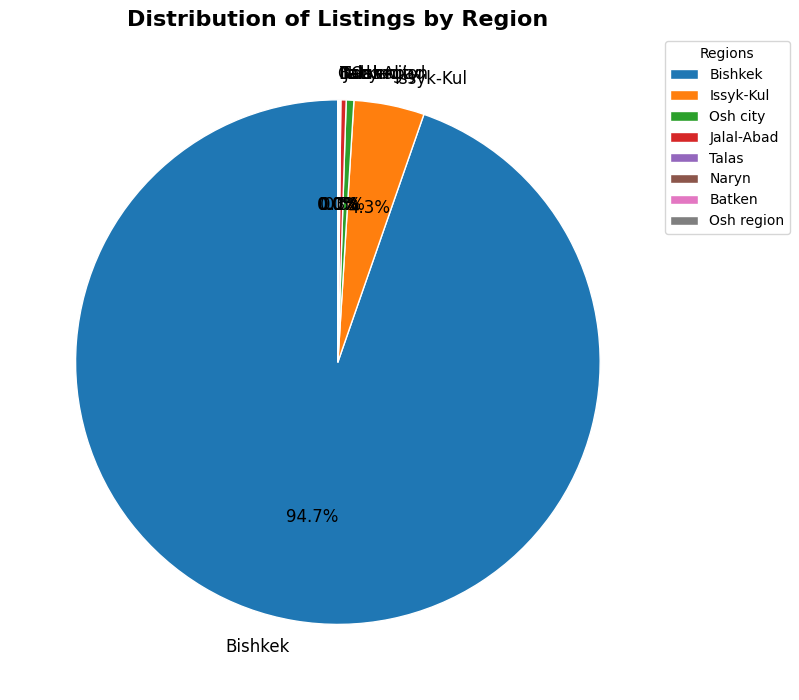

In [ ]:
region_counts = df['Region'].value_counts()

plt.figure(figsize=(8, 8)) 
region_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    ylabel="",
    textprops={'fontsize': 12},  
    wedgeprops={'edgecolor': 'white'}  
)
plt.title("Distribution of Listings by Region", fontsize=16, fontweight='bold')
plt.legend(region_counts.index, title="Regions", loc="upper right", bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()

This pie chart illustrates the distribution of real estate listings by region.

Each slice of the chart represents the percentage of all listings that come from a particular region.

From the chart, it can be seen which region has the largest share of listings and how other regions compare in size.

For example, if the Bishkek region covers the biggest part of the circle, it means most listings are located there, while other regions like Issyk-Kul or Osh have smaller shares.

This visualization helps to quickly understand the regional concentration of properties on the market.

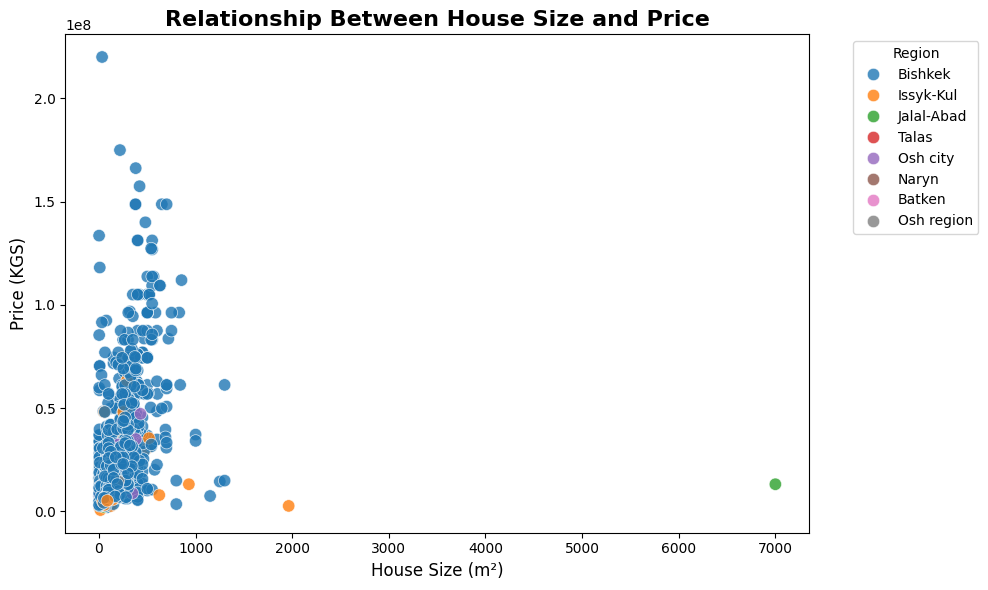

In [ ]:
df['Size_m2'] = df['Title'].str.extract(r'(\d+)\s?м2').astype(float)


plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Size_m2',
    y='Price_KGS',
    hue='Region',
    alpha=0.8,
    s=80,                    
    edgecolor='white',
    linewidth=0.5
)

plt.title("Relationship Between House Size and Price", fontsize=16, fontweight='bold')
plt.xlabel("House Size (m²)", fontsize=12)
plt.ylabel("Price (KGS)", fontsize=12)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

This scatter plot shows the relationship between house size (in square meters) and price (in Kyrgyzstani som).

Each point represents one house listing, and the color indicates the region where the house is located.

Overall, the chart helps to see how the price changes depending on the size of the house.

Larger houses generally tend to have higher prices, but there is also variation — some smaller houses may be expensive due to their location or quality.
The regional colors make it easier to compare price trends between different areas.


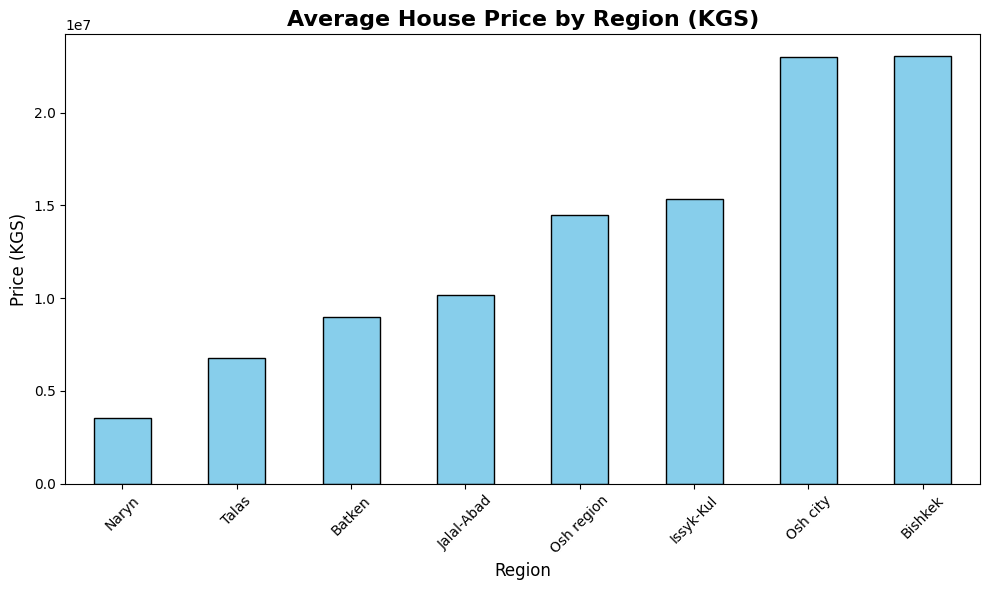

In [111]:
plt.figure(figsize=(10, 6))
df.groupby('Region')['Price_KGS'].mean().sort_values().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average House Price by Region (KGS)", fontsize=16, fontweight='bold')
plt.ylabel("Price (KGS)", fontsize=12)
plt.xlabel("Region", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This bar chart presents the average house price in Kyrgyzstani som (KGS) for each region.

Each bar represents the mean price of houses listed in that region.

The chart allows for an easy comparison between regions — showing which areas have higher or lower average housing prices.

Regions with taller bars indicate more expensive properties on average, while shorter bars represent more affordable regions.

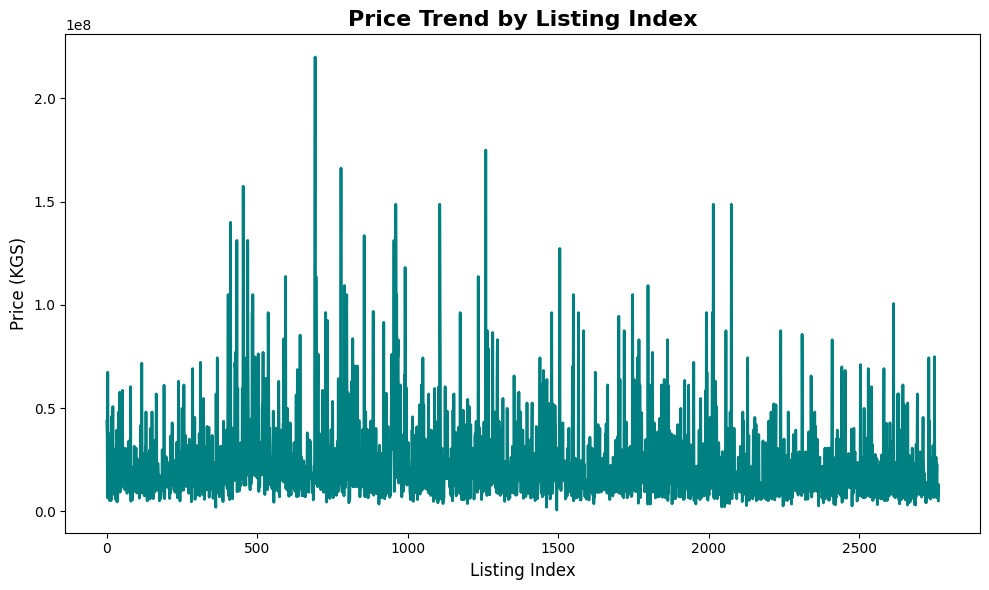

In [113]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Price_KGS'], color='teal', linewidth=2)
plt.title("Price Trend by Listing Index", fontsize=16, fontweight='bold')
plt.xlabel("Listing Index", fontsize=12)
plt.ylabel("Price (KGS)", fontsize=12)
plt.tight_layout()
plt.show()

This line chart illustrates how house prices change across the listing index.

Each point on the line represents the price of one listing, arranged in the order they appear in the dataset.

The chart helps to observe overall price trends — whether prices are generally increasing, decreasing, or fluctuating.

Some sharp peaks may indicate unusually expensive properties compared to the rest of the listings.

<Figure size 1000x600 with 0 Axes>

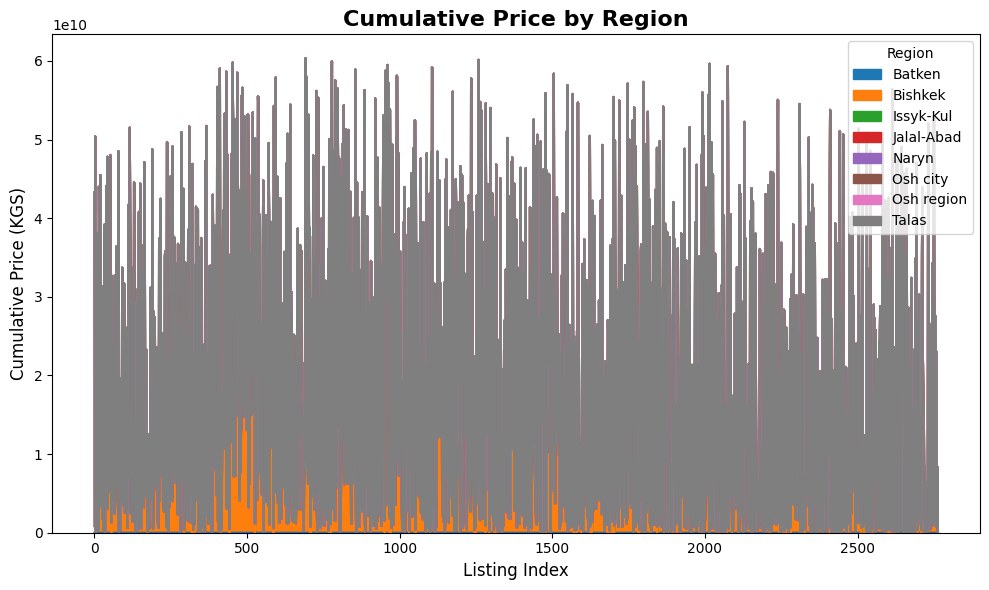

In [ ]:
plt.figure(figsize=(10, 6))


df_sorted = df.sort_values("Price_KGS")
df_sorted['Cumulative_Price'] = df_sorted.groupby('Region')['Price_KGS'].cumsum()


pivot_df = df_sorted.pivot_table(
    index=df_sorted.index,
    columns='Region',
    values='Cumulative_Price',
    fill_value=0
)

pivot_df.plot.area(figsize=(10, 6))
plt.title("Cumulative Price by Region", fontsize=16, fontweight='bold')
plt.ylabel("Cumulative Price (KGS)", fontsize=12)
plt.xlabel("Listing Index", fontsize=12)
plt.tight_layout()
plt.show()

This area chart shows the cumulative sum of house prices by region.

Each colored area represents the total value of listings in that region as the dataset progresses.

As the chart moves to the right, the areas expand, indicating the growing total price of houses over the listing index.

Regions with larger and steeper areas contribute more to the overall market value, showing where the most expensive properties are concentrated.

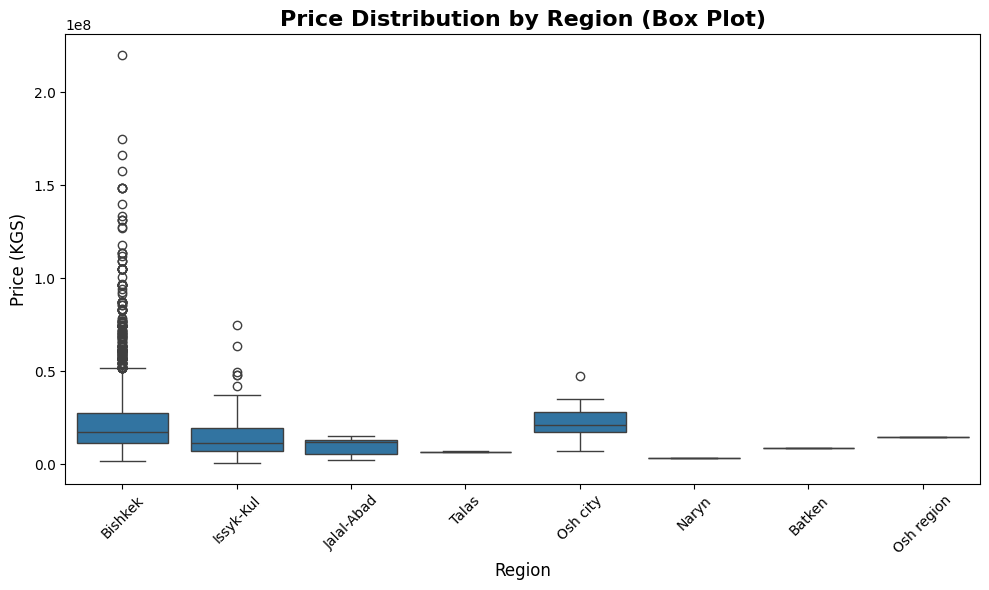

In [116]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Region', y='Price_KGS')
plt.title("Price Distribution by Region (Box Plot)", fontsize=16, fontweight='bold')
plt.xlabel("Region", fontsize=12)
plt.ylabel("Price (KGS)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This box plot compares the distribution of house prices across different regions.

Each box represents the range of prices in one region, including the median (center line) and the spread between higher and lower values.

The dots above or below the boxes indicate outliers — houses that are much more or less expensive than the majority.

This visualization helps to identify which regions have higher median prices and where the price variation is the largest.

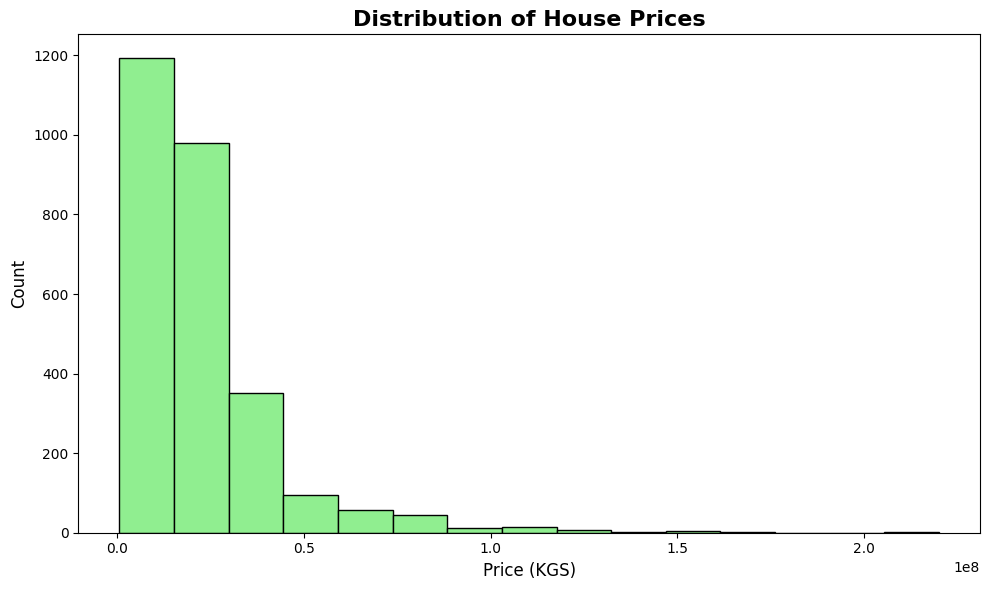

In [117]:
plt.figure(figsize=(10, 6))
plt.hist(df['Price_KGS'], bins=15, color='lightgreen', edgecolor='black')
plt.title("Distribution of House Prices", fontsize=16, fontweight='bold')
plt.xlabel("Price (KGS)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_17560\2711179254.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




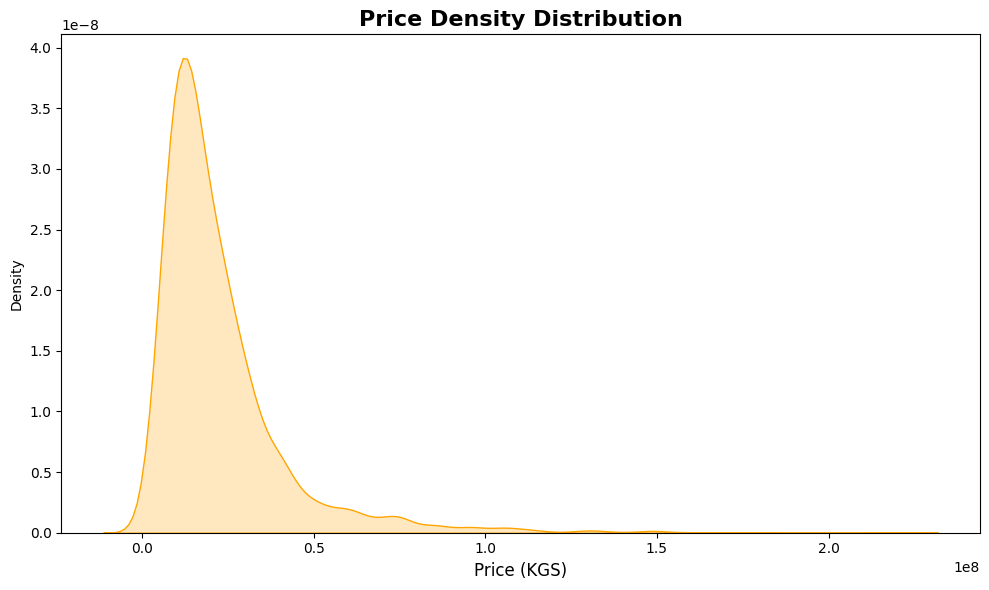

In [118]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Price_KGS'], shade=True, color='orange')
plt.title("Price Density Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Price (KGS)", fontsize=12)
plt.tight_layout()
plt.show()

This KDE (Kernel Density Estimate) plot illustrates the distribution of house prices.

It shows how frequently different price ranges appear in the dataset, forming a smooth curve instead of a bar chart.

The peaks of the curve indicate the most common price levels, while the tails show very cheap or very expensive houses.

This visualization helps to understand the overall shape of the price distribution and detect possible skewness or outliers.

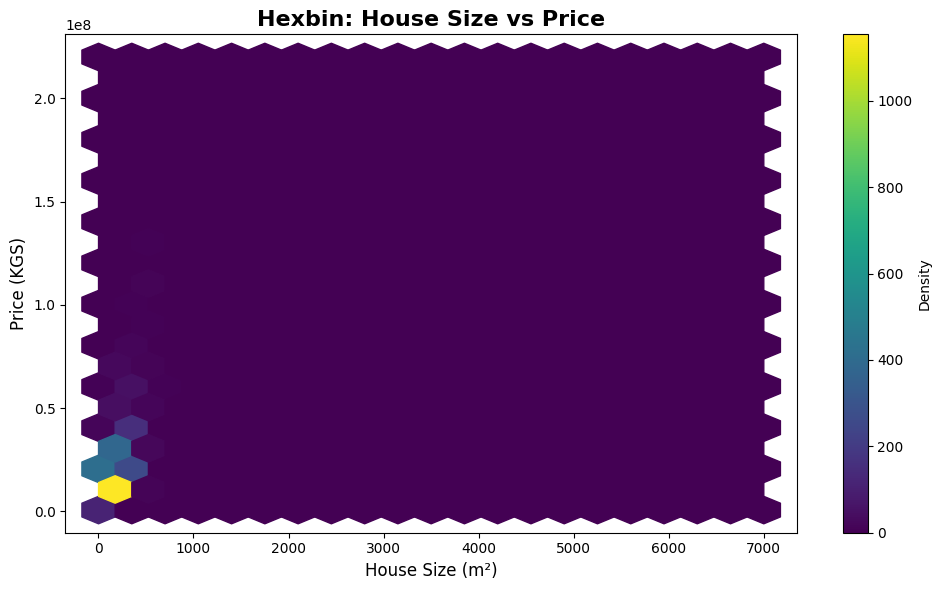

In [119]:
plt.figure(figsize=(10, 6))
plt.hexbin(df['Size_m2'], df['Price_KGS'], gridsize=20, cmap='viridis')
plt.title("Hexbin: House Size vs Price", fontsize=16, fontweight='bold')
plt.xlabel("House Size (m²)", fontsize=12)
plt.ylabel("Price (KGS)", fontsize=12)
plt.colorbar(label='Density')
plt.tight_layout()
plt.show()

vThis hexbin plot shows the relationship between house size and price.

Each hexagon represents the density of listings — darker or more intense colors mean more houses fall in that size and price range.

The plot helps to see how prices generally change with house size and where most listings are concentrated.

It also highlights clusters of typical houses and any unusual patterns, such as small but expensive or large but cheap properties.

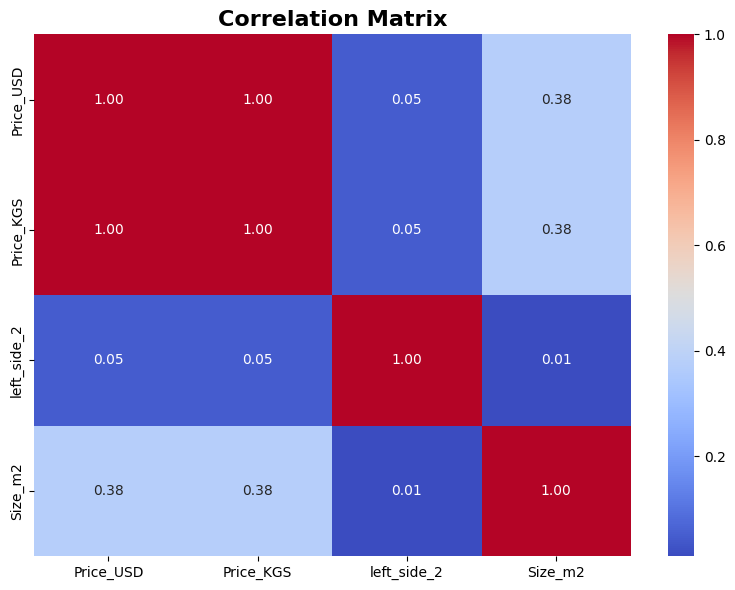

In [120]:
plt.figure(figsize=(8, 6))
num_cols = df.select_dtypes(include='number')
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

This heatmap displays the correlation matrix of all numeric variables in the dataset.

Each cell shows the strength and direction of the relationship between two variables, measured by the correlation coefficient.

Values close to 1 indicate a strong positive correlation, while values near –1 show a strong negative correlation.

The color gradient helps to quickly identify which factors are related — for example, whether larger houses tend to have higher prices.

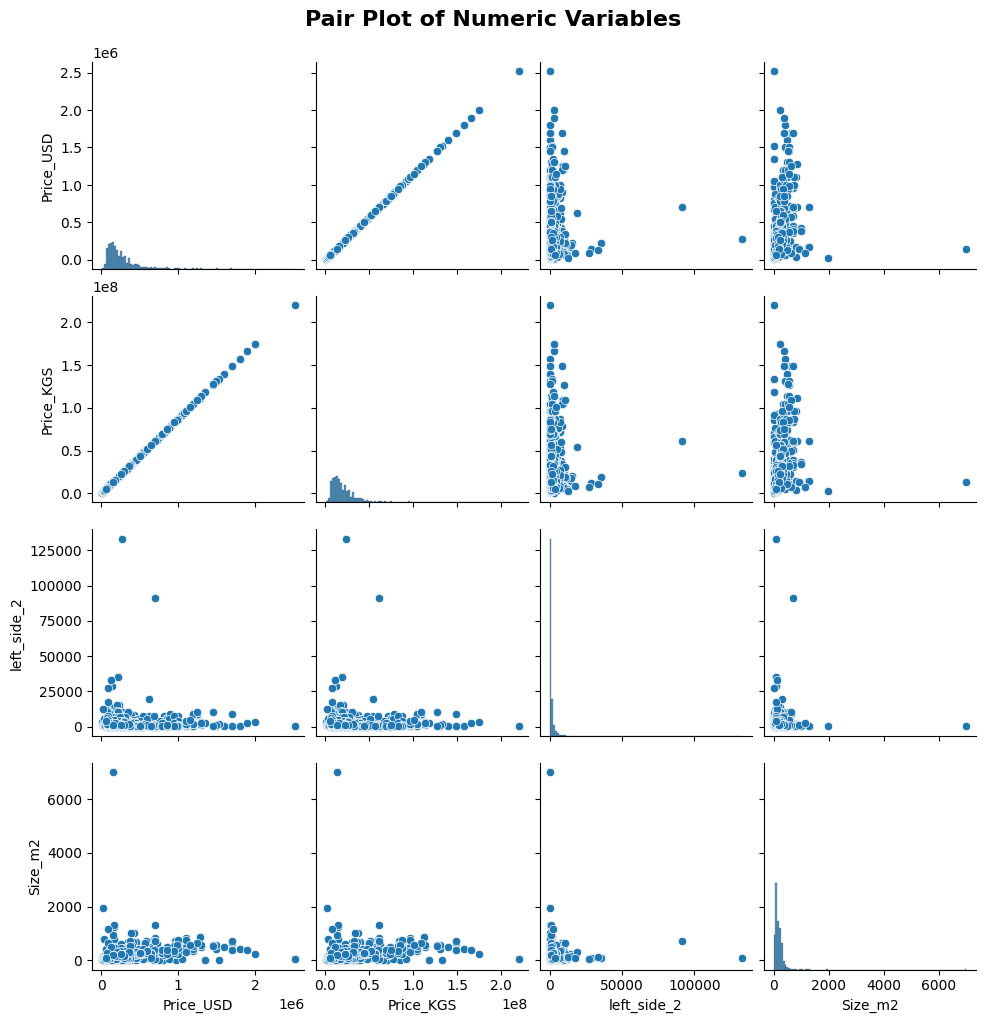

In [121]:
sns.pairplot(num_cols)
plt.suptitle("Pair Plot of Numeric Variables", fontsize=16, fontweight='bold', y=1.02)
plt.show()

<h>DESCRIPTIVE STATISTICS</h>


In [ ]:
num_cols = df.select_dtypes(include=[np.number])

print("🔹 Basic Descriptive Statistics for Numeric Columns:")
display(num_cols.describe().T)


print("\n🔹 Extended Numeric Insights:")

extra_stats = pd.DataFrame({
    'Missing Values': num_cols.isna().sum(),
    'Unique Values': num_cols.nunique(),
    'Mean': num_cols.mean(),
    'Median': num_cols.median(),
    'Std Dev': num_cols.std(),
    'Min': num_cols.min(),
    'Max': num_cols.max(),
    'Range': num_cols.max() - num_cols.min(),
    'Skewness': num_cols.skew(),
    'Kurtosis': num_cols.kurt()
}).round(2)

display(extra_stats)


cat_cols = df.select_dtypes(exclude=[np.number])

print("\n🔹 Categorical Columns Summary:")
for col in cat_cols.columns:
    print(f"\n▶ {col}")
    print(df[col].value_counts().head(10))
    print(f"Unique values: {df[col].nunique()}")
    print("-" * 50)


print("\n🔹 Top 5 Most Expensive Listings:")
display(df.nlargest(5, 'Price_KGS')[['Title', 'Region', 'Price_KGS']])

print("\n🔹 Bottom 5 Cheapest Listings:")
display(df.nsmallest(5, 'Price_KGS')[['Title', 'Region', 'Price_KGS']])

🔹 Basic Descriptive Statistics for Numeric Columns:


,count,mean,std,min,25%,50%,75%,max
Price_USD,2764.0,259114.164255,222039.870726,7000.0,125772.0,195000.0,310000.0,2515436.0
Price_KGS,2764.0,22662124.682344,19419607.178199,612220.0,11000000.0,17054700.0,27112600.0,220000000.0
left_side_2,2764.0,1231.367945,3679.352555,1.0,282.0,611.5,1204.25,133213.0
Size_m2,2764.0,174.991679,184.659943,1.0,90.0,145.0,230.0,7000.0



🔹 Extended Numeric Insights:


,Missing Values,Unique Values,Mean,Median,Std Dev,Min,Max,Range,Skewness,Kurtosis
Price_USD,0,646,259114.16,195000.0,222039.87,7000.0,2515436.0,2508436.0,3.07,14.5
Price_KGS,0,647,22662124.68,17054700.0,19419607.18,612220.0,220000000.0,219387780.0,3.07,14.5
left_side_2,0,1499,1231.37,611.5,3679.35,1.0,133213.0,133212.0,23.42,737.26
Size_m2,0,344,174.99,145.0,184.66,1.0,7000.0,6999.0,19.35,680.2



🔹 Categorical Columns Summary:

▶ Title
Title
Дом, 6 и более комнат, 300 м2, 4 сотки    28
Дом, 6 и более комнат, 280 м2, 4 сотки    22
Дом, 4-комн., 100 м2, 4 сотки             19
Дом, 6 и более комнат, 200 м2, 4 сотки    18
Дом, 6 и более комнат, 220 м2, 4 сотки    14
Дом, 5-комн., 200 м2, 4 сотки             14
Дом, 4-комн., 100 м2, 5 соток             12
Дом, 5-комн., 120 м2, 4 сотки             11
Дом, 5-комн., 100 м2, 4 сотки             11
Дом, 4-комн., 110 м2, 4 сотки             11
Name: count, dtype: int64
Unique values: 1895
--------------------------------------------------

▶ Address
Address
Бишкек, Арча-Бешик ж/м     148
Бишкек, Ак-Ордо ж/м         72
Бишкек, с. Кок-Джар         53
Бишкек, Кок-Жар ж/м         50
Бишкек, Ак-Орго ж/м         44
Бишкек, Пишпек ж/м          33
Бишкек, Рухий Мурас ж/м     32
Бишкек, Ынтымак ж/м         32
с. Новопокровка             30
с. Беш-Кунгей               25
Name: count, dtype: int64
Unique values: 1551
-------------------------------

,Title,Region,Price_KGS
692,"Дом, 6 и более комнат, 58.32 м2, 60 соток",Bishkek,220000000
1259,"Дом, 4-комн., 217 м2, 8 соток",Bishkek,174920000
778,"Дом, 4-комн., 380 м2, 7 соток",Bishkek,166174000
453,"Дом, 6 и более комнат, 420 м2, 28 соток",Bishkek,157428000
960,"Дом, 6 и более комнат, 650 м2, 8 соток",Bishkek,148682000



🔹 Bottom 5 Cheapest Listings:


,Title,Region,Price_KGS
1495,"Дом, 2-комн., 15 м2, 1 сотка",Issyk-Kul,612220
362,"Дом, 5-комн., 80 м2, 5 соток",Bishkek,1967850
1461,"Дом, 3-комн., 26.2 м2, 2 сотки",Issyk-Kul,2000000
2043,"Дом, 4-комн., 90 м2, 8 соток",Bishkek,2142770
2052,"Дом, 4-комн., 50 м2, 20 соток",Jalal-Abad,2186500


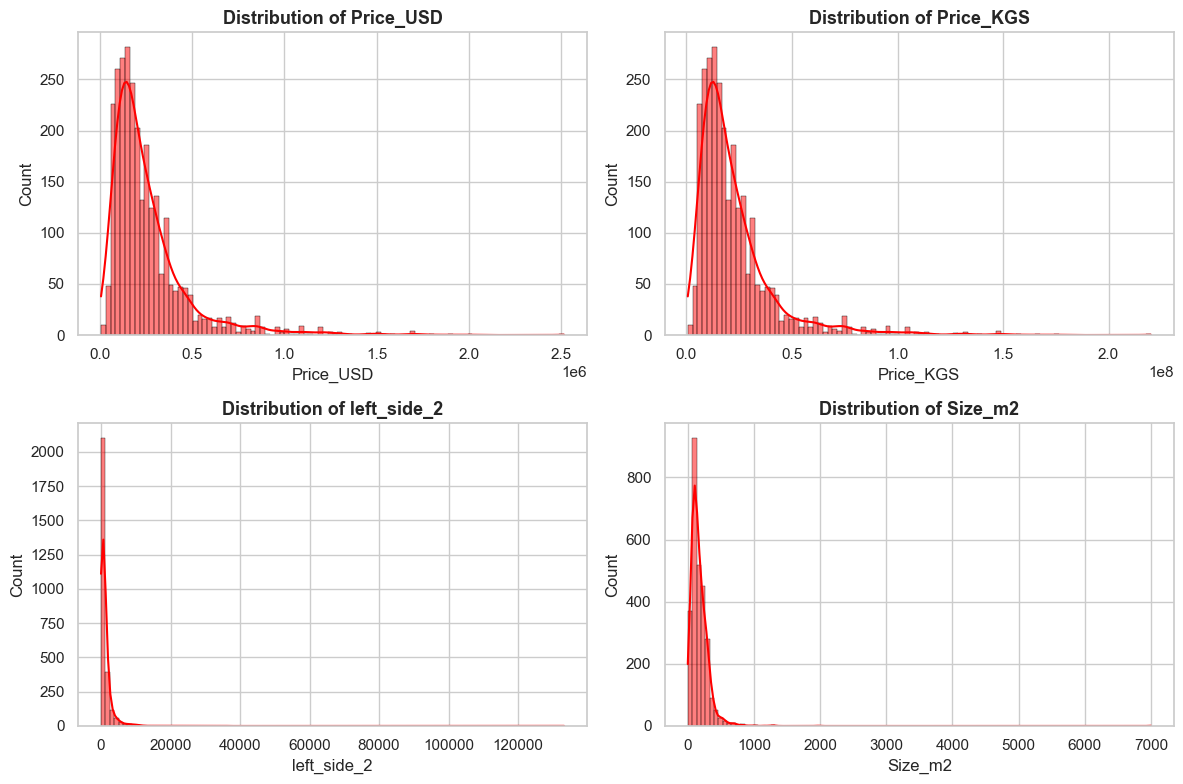

In [124]:
sns.set(style="whitegrid", palette="viridis")

num_cols = df.select_dtypes(include=[np.number]).columns


cols = 2
rows = int(np.ceil(len(num_cols) / cols))

plt.figure(figsize=(12, rows * 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[col], kde=True, color='red', edgecolor='black')
    plt.title(f"Distribution of {col}", fontsize=13, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()